# Chapter 3. Inferences with binomials

Book Source: Bayesian Cognitive Modeling A Practical Course, Lee and Wagenmakers

In [33]:
import numpyro 
import numpyro.distributions as dist 
from numpyro.infer import MCMC, NUTS, Predictive
import jax 
import jax.random as random 
import jax.numpy as jnp 

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns; 
import arviz
#sns.set_style("darkgrid"); 

plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.style.use("dark_background")

In [2]:
rng_key = random.PRNGKey(0)
rng_key, sub = jax.random.split(rng_key)
rng_key

array([4146024105,  967050713], dtype=uint32)

## 3.1 Infering a rate

## 3.2 Difference between two rates

In [26]:
def model(a, b, N, k=None):
    """
        N: an array of Ns
        k: array of observations from N trials.
    """
    size = len(N)
    with numpyro.plate(f'N:{size}', size=len(N)):
        theta = numpyro.sample('theta', dist.Beta(a, b))
        obs = numpyro.sample('obs', dist.Binomial(total_count=N, probs=theta), obs=k)
    #
    delta = theta[0] - theta[1]
    numpyro.deterministic('d', delta)

Data

In [27]:
#
a, b = 1, 1  # prior model
N = jnp.array([10, 10])
k = jnp.array([5, 7])   # observations from binomial 

Graphical Model

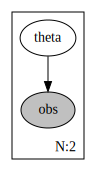

In [28]:
numpyro.render_model(model, model_args=(a, b, N, k))

Run MCMC Inference.

In [29]:
kernel = NUTS(model)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=5000, num_chains=1)
#
mcmc.run(rng_key, a=b, b=b, N=N, k=k)
mcmc.print_summary()

sample: 100%|██████████| 6000/6000 [00:06<00:00, 923.30it/s, 1 steps of size 8.70e-01. acc. prob=0.92]  


                mean       std    median      5.0%     95.0%     n_eff     r_hat
  theta[0]      0.50      0.14      0.50      0.28      0.74   3804.44      1.00
  theta[1]      0.66      0.13      0.67      0.47      0.89   4560.59      1.00

Number of divergences: 0


In [30]:
samples = mcmc.get_samples()
samples

{'d': DeviceArray([-0.30024898, -0.5183285 , -0.49761426, ..., -0.24937439,
              -0.2833853 , -0.21062899], dtype=float32),
 'theta': DeviceArray([[0.5998734 , 0.9001224 ],
              [0.4210468 , 0.9393753 ],
              [0.42074865, 0.9183629 ],
              ...,
              [0.34993732, 0.5993117 ],
              [0.25813952, 0.5415248 ],
              [0.30431813, 0.5149471 ]], dtype=float32)}

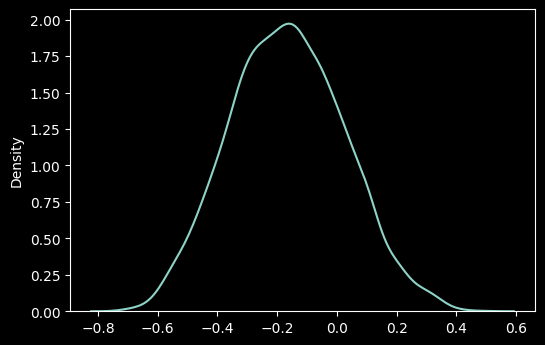

In [32]:
sns.kdeplot(samples['d']);

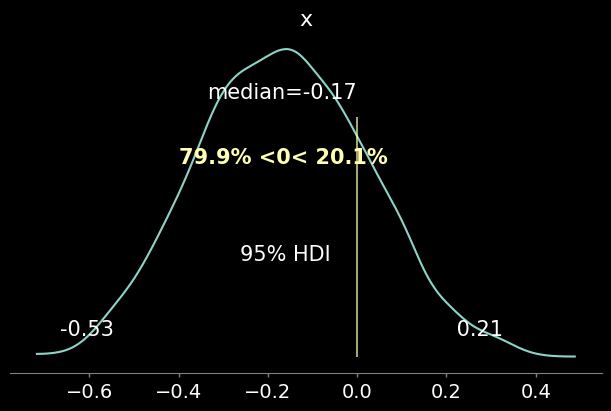

In [41]:
arviz.plot_posterior(np.array(samples['d']),point_estimate='median', ref_val=0, hdi_prob=.95);

### Exercises
1. Compare k1=8, n1=10, k2=7, n2=10, and k1=80, n1=100, k2=70, n2=100. Before you run the code, try to predict the effect that adding more trials has on the posterior distribution for $\delta$.
2. Try
3. In what context

---

## 3.3 Inferring a common rate

In [43]:
def model33(a, b, N, k=None):
    """
        N: an array of Ns
        k: array of observations from N trials.
    """
    # common rate, hidden
    theta = numpyro.sample('theta', dist.Beta(a, b))
    size = len(N)
    # observation model
    with numpyro.plate(f'N:{size}', size=len(N)):
        obs = numpyro.sample('obs', dist.Binomial(total_count=N, probs=theta), obs=k)
    #

Data

In [44]:
#
a, b = 1, 1  # prior model
N = jnp.array([10, 10])
k = jnp.array([5, 7])   # observations from binomial 

Graphical Model

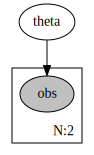

In [46]:
numpyro.render_model(model33, model_args=(a, b, N, k))

Run MCMC Inference.

In [47]:
kernel = NUTS(model33)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=5000, num_chains=1)
#
mcmc.run(rng_key, a=b, b=b, N=N, k=k)
mcmc.print_summary()

sample: 100%|██████████| 6000/6000 [00:06<00:00, 966.14it/s, 3 steps of size 9.97e-01. acc. prob=0.91] 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
     theta      0.59      0.10      0.59      0.43      0.77   1783.33      1.00

Number of divergences: 0


In [48]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([0.6161615 , 0.5910452 , 0.5675165 , ..., 0.7260643 ,
              0.67617434, 0.6286371 ], dtype=float32)}

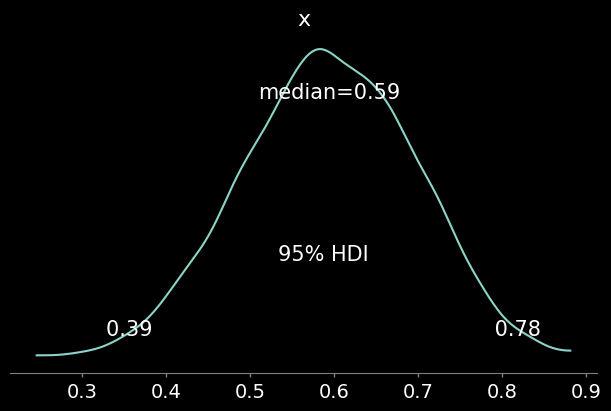

In [53]:
arviz.plot_posterior(np.array(samples['theta']),point_estimate='median', hdi_prob=.95);

### Exercises 3.3
1. Try k1=14, n1=20, k2=16, n2=20. How could you report the inference about the common rate $\theta$?2. Try
3. Compare

---

## 3.4 Prior and posterior prediction

In [59]:
def model34(a, b, N, k=None):
    th = numpyro.sample('th', dist.Beta(a, b))
    
    k = numpyro.sample('obs', dist.Binomial(total_count=N, probs=th), obs=k)

In [67]:
#
a, b = 1, 1  # prior model
N = 15
k = 1   # observations from binomial 

Graphical Model

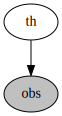

In [68]:
numpyro.render_model(model34, model_args=(a, b, N, k))

Run MCMC Inference.

In [69]:
kernel = NUTS(model34)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=5000, num_chains=1)
#
mcmc.run(rng_key, a=b, b=b, N=N, k=k)
mcmc.print_summary()

sample: 100%|██████████| 6000/6000 [00:06<00:00, 940.91it/s, 3 steps of size 9.50e-01. acc. prob=0.90] 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        th      0.12      0.08      0.10      0.01      0.23   1645.31      1.00

Number of divergences: 0


In [70]:
samples = mcmc.get_samples()
samples

{'th': DeviceArray([0.12633157, 0.11398548, 0.04423351, ..., 0.27759755,
              0.16216414, 0.13281357], dtype=float32)}

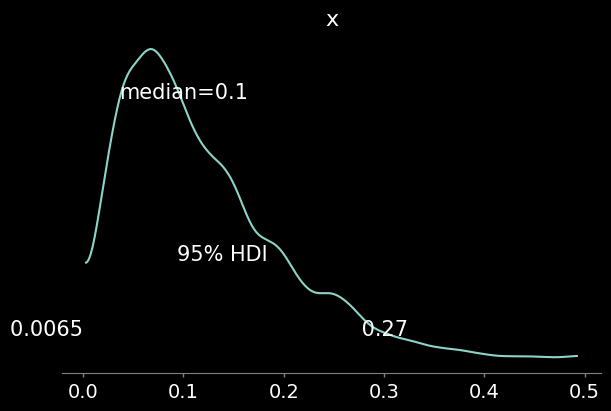

In [71]:
arviz.plot_posterior(np.array(samples['th']),point_estimate='median', hdi_prob=.95);

### Prior Prediction

In [74]:
predictive = Predictive(model34, num_samples=4500)
prior_pred = predictive(rng_key, a, b, N)

In [75]:
prior_pred

{'obs': DeviceArray([ 9,  5, 13, ..., 12,  2,  5], dtype=int32),
 'th': DeviceArray([0.5272807 , 0.46009701, 0.9038901 , ..., 0.6188832 ,
              0.30818576, 0.41342816], dtype=float32)}

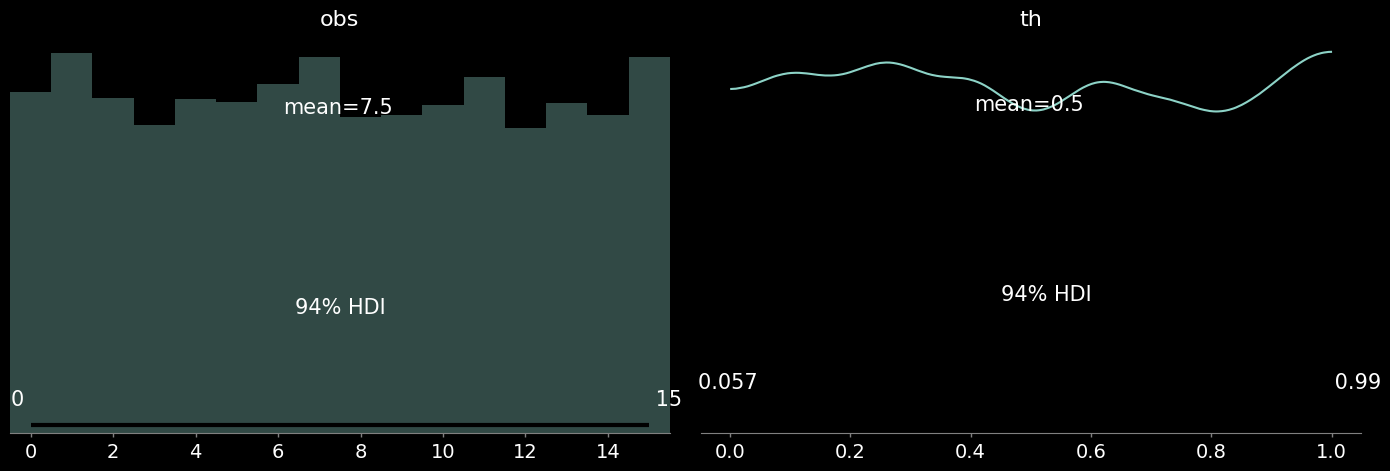

In [77]:
arviz.plot_posterior(prior_pred);

Parameter $\theta$ is a continuous variable. So iether KDE plot or histogram plot may be used.

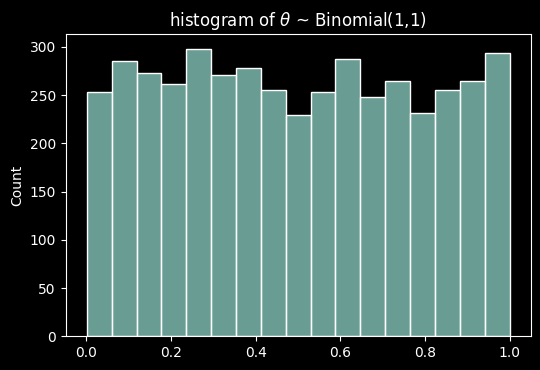

In [91]:
ax = sns.histplot(prior_pred['th']);
ax.set(title='histogram of $\\theta$ ~ Binomial(1,1)');

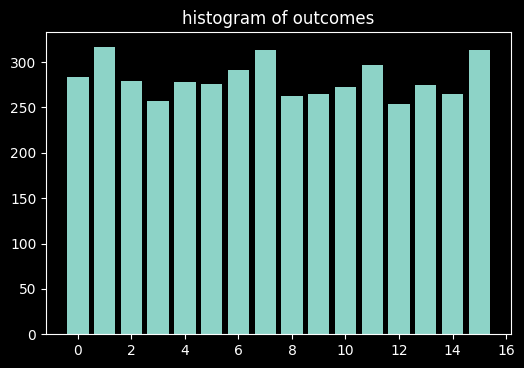

In [89]:
uniq, cnts = np.unique(prior_pred['obs'], return_counts=True)
plt.bar(uniq, cnts); plt.title('histogram of outcomes');

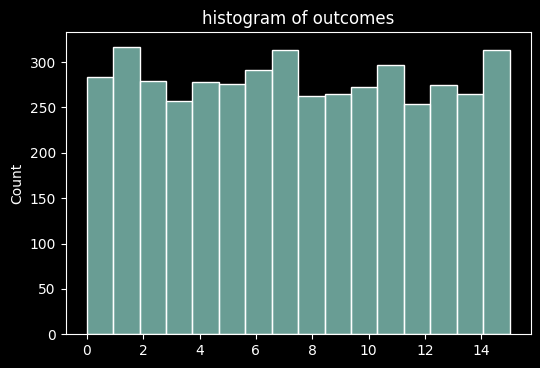

In [87]:
ax = sns.histplot(prior_pred['obs']);
ax.set(title='histogram of outcomes');

### Posterior Prediction

In [92]:
predictive = Predictive(model34, posterior_samples=samples)
post_pred = predictive(rng_key, a, b, N)

In [93]:
post_pred

{'obs': DeviceArray([2, 1, 0, ..., 4, 3, 1], dtype=int32)}

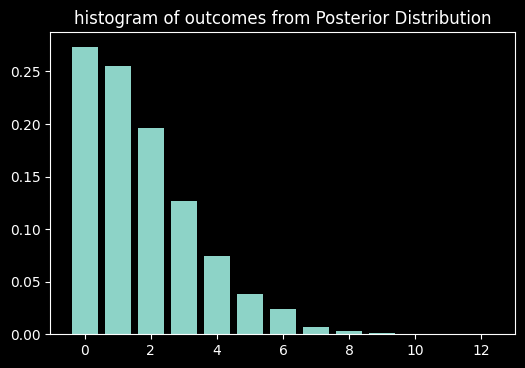

In [107]:
uniq, cnts = np.unique(post_pred['obs'], return_counts=True)
plt.bar(uniq, cnts/cnts.sum()); plt.title('histogram of outcomes from Posterior Distribution');

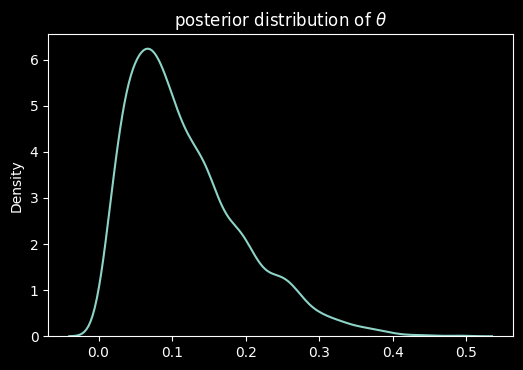

In [106]:
ax = sns.kdeplot(x=samples['th']);
ax.set(title='posterior distribution of $\\theta$');

### Exercises 3.4
1. Make sure you understand
2. Try different priors on $\theta$
3. Predictive distributions are not restricted
4. In October 2009, the Duch newspaper Truw reported on research by H. Trompetter, a student from

---

## 3.5 Posterior prediction

- One important use of posterior predictive distributions is to examine the descriptive adequacy of a model.
- If these predictions do not match the data already seen, the model is descriptively inadequate.

Let's use `model33` as an example of a working model.

In [109]:
def model33(a, b, N, k=None):
    """
        N: an array of Ns
        k: array of observations from N trials.
    """
    # common rate, hidden
    theta = numpyro.sample('theta', dist.Beta(a, b))
    size = len(N)
    # observation model
    with numpyro.plate(f'N:{size}', size=len(N)):
        obs = numpyro.sample('obs', dist.Binomial(total_count=N, probs=theta), obs=k)
    #

In [110]:
N = jnp.array([10, 10])
k = jnp.array([0, 10])  # quite radical 
a, b = 1, 1 # prior

In [111]:
kernel = NUTS(model33)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=5000, num_chains=1)
#
mcmc.run(rng_key, a=b, b=b, N=N, k=k)
mcmc.print_summary()

sample: 100%|██████████| 6000/6000 [00:06<00:00, 935.53it/s, 3 steps of size 7.96e-01. acc. prob=0.94] 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
     theta      0.50      0.10      0.50      0.33      0.67   1988.20      1.00

Number of divergences: 0


In [112]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([0.5030112 , 0.49335113, 0.5980427 , ..., 0.5275174 ,
              0.5356074 , 0.5218698 ], dtype=float32)}

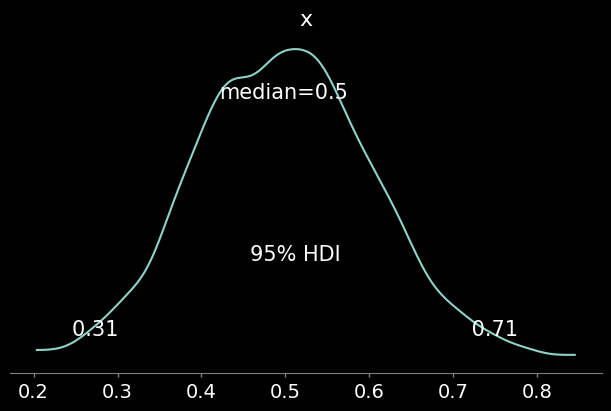

In [114]:
# posterior density plot
arviz.plot_posterior(np.array(samples['theta']),point_estimate='median', hdi_prob=.95);

In [115]:
predictive = numpyro.infer.Predictive(model33, posterior_samples=samples)
ppred = predictive(rng_key, a, b, N)

In [116]:
ppred

{'obs': DeviceArray([[3, 3],
              [4, 4],
              [6, 6],
              ...,
              [6, 5],
              [7, 5],
              [3, 5]], dtype=int32)}

In [130]:
# make a histogram or posterior predictions
hist2d = np.zeros((N[0]+1, N[1]+1), dtype=np.int)
for item in ppred['obs']:
    hist2d[item[0], item[1]] += 1

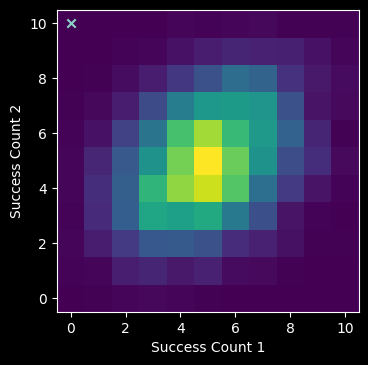

In [129]:
plt.imshow(hist2d, origin='lower');
plt.xlabel('Success Count 1'); plt.ylabel('Success Count 2');
plt.scatter(x=[k[0]], y=[k[1]], marker='x');

### Exercise 3.5
1. Why is the posterior
2. What do you conclude?
3. What can you conclude about the parameter $\theta$?

---

## 3.6 Joint distributions

- There are cases where the rate $\theta$ and the total number $N$ are both unknown, and so the problem is to infer both simultaneously from counts of success $k$.

- Figure 3.12 shows the graphical moel for the joint inference of $n$ an $\theta$ from a set of $m$ observed counts of successes $k_1$, ..., $k_m$.

\begin{align}
    k_i & \sim \mathrm{Binomial}(\theta, n)  \\
    \theta & \sim \mathrm{Beta}(1, 1) \\
    n & \sim \mathrm{Categorical}(\frac{1}{n_\mathrm{max}}, \ldots, \frac{1}{n_\mathrm{max}}) 
\end{align}

In [374]:
def model36(a, b, probs, k=None):
    """
        k: m dimensional. observation vector out of binomial
    """
    # priors: th, n
    n = numpyro.sample('n', dist.Categorical(probs=probs))
    th = numpyro.sample('th', dist.Beta(a, b))
    # observation
    size = len(k)
    with numpyro.plate(f'i=1..{size}', size=size):
        obs = numpyro.sample('k', dist.Binomial(total_count=n, probs=th), obs=k)

In [375]:
# data
# https://github.com/stan-dev/example-models/blob/master/Bayesian_Cognitive_Modeling/ParameterEstimation/Binomial/Survey.data.R
a, b = 1, 1
k = jnp.array([16, 18, 22, 25, 27])
nmax = 500
probs = jnp.array([1.]*nmax) / nmax

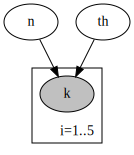

In [376]:
numpyro.render_model(model36, model_args=(a, b, probs, k))

In [436]:
# We need another sampler to obtain discrete latent sites.
# http://num.pyro.ai/en/stable/mcmc.html#numpyro.infer.hmc_gibbs.DiscreteHMCGibbs
kernel = numpyro.infer.DiscreteHMCGibbs(NUTS(model36), modified=True)
# kernel = NUTS(model36)
#
mcmc = MCMC(kernel, num_warmup=1000, num_samples=5000, num_chains=1, thinning=1)
mcmc.run(rng_key, a=b, b=b, probs=probs, k=k)
mcmc.print_summary()

sample: 100%|██████████| 6000/6000 [00:09<00:00, 600.68it/s, 3 steps of size 2.32e-01. acc. prob=0.90]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         n    159.23    101.53    131.00     33.00    307.00     13.25      1.01
        th      0.20      0.13      0.17      0.04      0.39     16.38      1.01



In [437]:
samples = mcmc.get_samples()
samples.keys()

dict_keys(['n', 'th'])

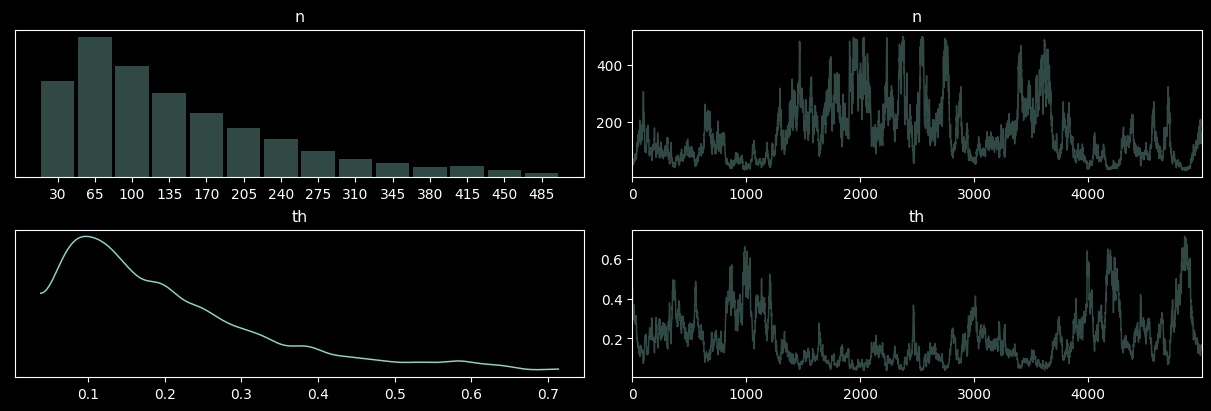

In [438]:
arviz.plot_trace(samples);

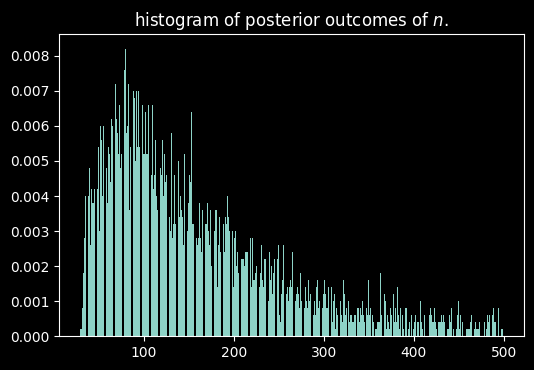

In [440]:
uniq, cnts = np.unique(samples['n'], return_counts=True)
plt.bar(uniq, cnts/cnts.sum()); plt.title('histogram of posterior outcomes of $n$.');

<AxesSubplot:>

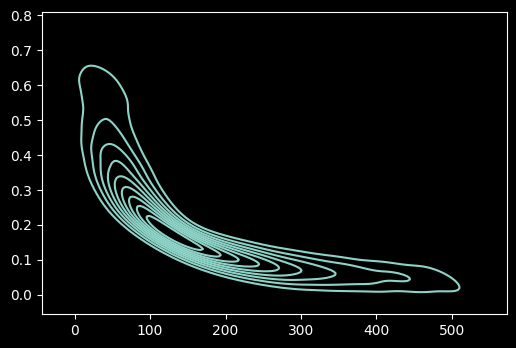

In [450]:
p = sns.kdeplot(x=samples['n'], y=samples['th']);
p.get_

In [467]:
def argmax_kde(x, y):
#x = samples['n']
#y = samples['th']
    xmin, xmax = 0, nmax
    ymin, ymax = 0, 1
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    import scipy
    kde_kernel = scipy.stats.gaussian_kde(values)
    f = np.reshape(kde_kernel(positions).T, xx.shape)
    mval = 0
    ii, jj = 0, 0
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            if f[i,j] > mval:
                mval = f[i, j]
                ii, jj = i, j
    mval, ii, jj, 
    iix, iiy = xx[ii][jj], yy[ii,jj]
    return iix, iiy

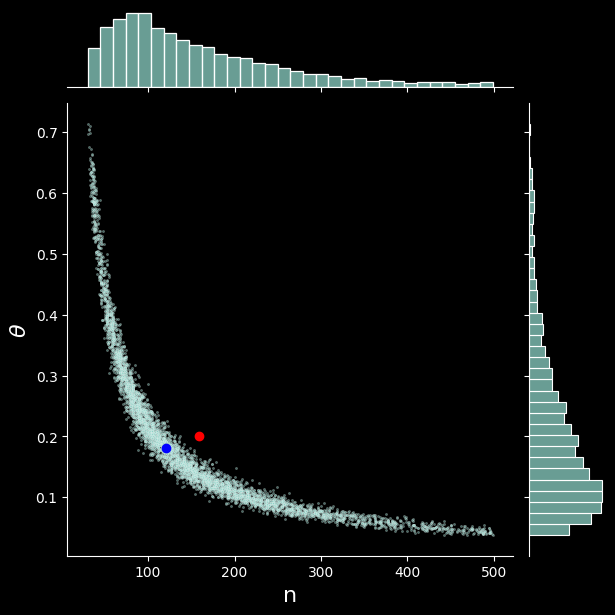

In [468]:
# https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
g = sns.jointplot(x=samples['n'], y=samples['th'], s=10, alpha=.5, marker='.')
g.set_axis_labels('n', '$\\theta$', fontsize=16);
# g.plot_marginals(sns.rugplot, color='r', height=.1, clip_on=False);
g.ax_joint.plot(samples['n'].mean(), samples['th'].mean(), 'ro');

iix, iiy = argmax_kde(samples['n'], samples['th'])
g.ax_joint.plot(iix, iiy, 'bo');

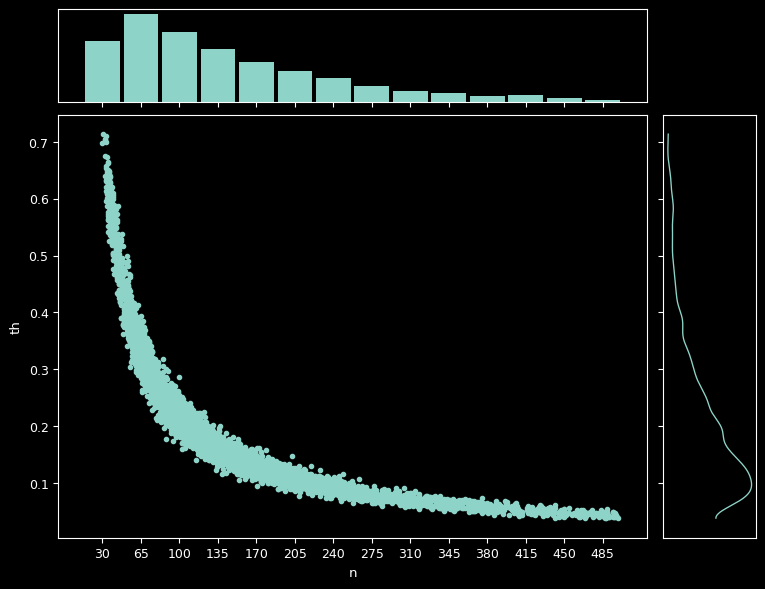

In [401]:
# https://arviz-devs.github.io/arviz/api/generated/arviz.plot_pair.html
arviz.plot_pair(samples, marginals=True, figsize=(9,7), textsize=9, );

### So what?
- It is clear that the joint distribution carries more information than the marginals.
    - Just looking at the marginals will not give a complete account of the inferencs made, and may provide a misleading account.
- For this example, it is intuitively obvious why the joint posterior distribution has the clear non-linear structure it does. 
    - One possible way in which 20 surveys might be returned is if there were only about 50 surveys, but 40% were returned. 
    - Another possibility is that there were 500 surveys, but only a 4% return rate. 
    - In general, the number and return rate can trade-off against each other, sweeping out the joint posterior distribution seen in Figure 3.13.

### Exercises 3.6
1. The basic moral of this example is that
2. The circle
3. Try the very slightly changed data $k=[16, 18, 22, 25, 28]$. Also, $k=[16, 18, 22, 25, 38]$.
    - Try to see the locations of blue and red dots.
4. The sequence of samples in the trace, some autocorrelatioin is evident. A remedy is to increase thinning parameter:

```
mcmc = MCMC(kernel, num_warmup=1000, num_samples=5000, num_chains=1, thinning=1)

```

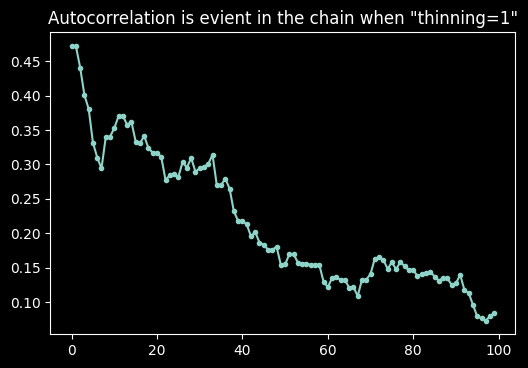

In [384]:
plt.plot(samples['th'][:100], '.-');
plt.title('Autocorrelation is evient in the chain when "thinning=1"');

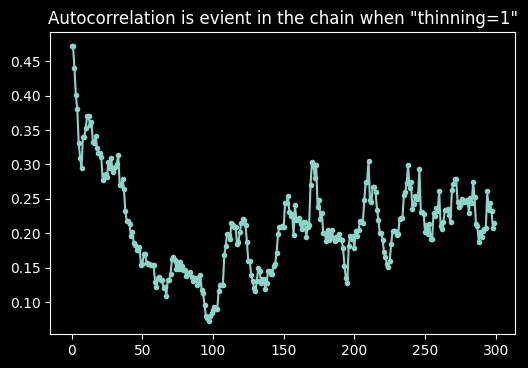

In [385]:
plt.plot(samples['th'][:300], '.-');
plt.title('Autocorrelation is evient in the chain when "thinning=1"');

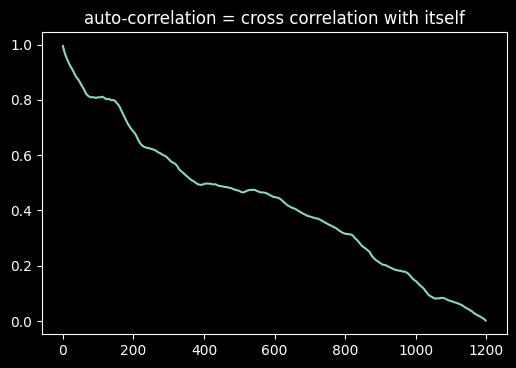

In [386]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html
# https://en.wikipedia.org/wiki/Cross-correlation
from scipy import signal

th_len = 1200
th = samples['th'][:th_len]
th = th / np.linalg.norm(th)  # normalize
c = signal.correlate(th, th, mode='full') # sliding inner-product

plt.plot(c[th_len:]); 
plt.title('auto-correlation = cross correlation with itself');

In [387]:
np.dot(th, th) 

1.0000001

---

### Modeling with Uniform[0,1]

- `numpyro` works with it due to some unknown internal operation.

In [470]:
def modelu(a, b, nmax, k=None):
    """
        k: m dimensional. observation vector out of binomial
    """
    # priors: th, n
    u = numpyro.sample('u', dist.Uniform())
#     n = jnp.array(u * nmax, dtype=int)
    n = u * nmax
    numpyro.deterministic('n', n)
    th = numpyro.sample('th', dist.Beta(a, b))
    # observation
    size = len(k)
    with numpyro.plate(f'i=1..{size}', size=size):
        obs = numpyro.sample('k', dist.Binomial(total_count=n, probs=th), obs=k)

In [471]:
# data
# https://github.com/stan-dev/example-models/blob/master/Bayesian_Cognitive_Modeling/ParameterEstimation/Binomial/Survey.data.R
a, b = 1, 1
k = jnp.array([16, 18, 22, 25, 27])
nmax = 500
probs = jnp.array([1.]*nmax) / nmax

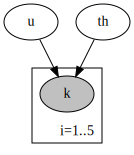

In [472]:
numpyro.render_model(modelu, model_args=(a, b, nmax, k))

In [473]:
# We need another sampler to obtain discrete latent sites.
# http://num.pyro.ai/en/stable/mcmc.html#numpyro.infer.hmc_gibbs.DiscreteHMCGibbs
# kernel = numpyro.infer.DiscreteHMCGibbs(NUTS(model36), modified=True)
kernel = NUTS(modelu)
#
mcmc = MCMC(kernel, num_warmup=1000, num_samples=5000, num_chains=1, thinning=1)
mcmc.run(rng_key, a=b, b=b, nmax=nmax, k=k)
mcmc.print_summary(exclude_deterministic=False)

sample: 100%|██████████| 6000/6000 [00:07<00:00, 797.77it/s, 31 steps of size 7.69e-02. acc. prob=0.92] 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         n    178.90    122.64    139.44     30.46    375.08    607.43      1.00
        th      0.20      0.14      0.15      0.04      0.42    609.16      1.00
         u      0.36      0.25      0.28      0.06      0.75    607.43      1.00

Number of divergences: 16


In [474]:
samples = mcmc.get_samples()
samples.keys()

dict_keys(['n', 'th', 'u'])

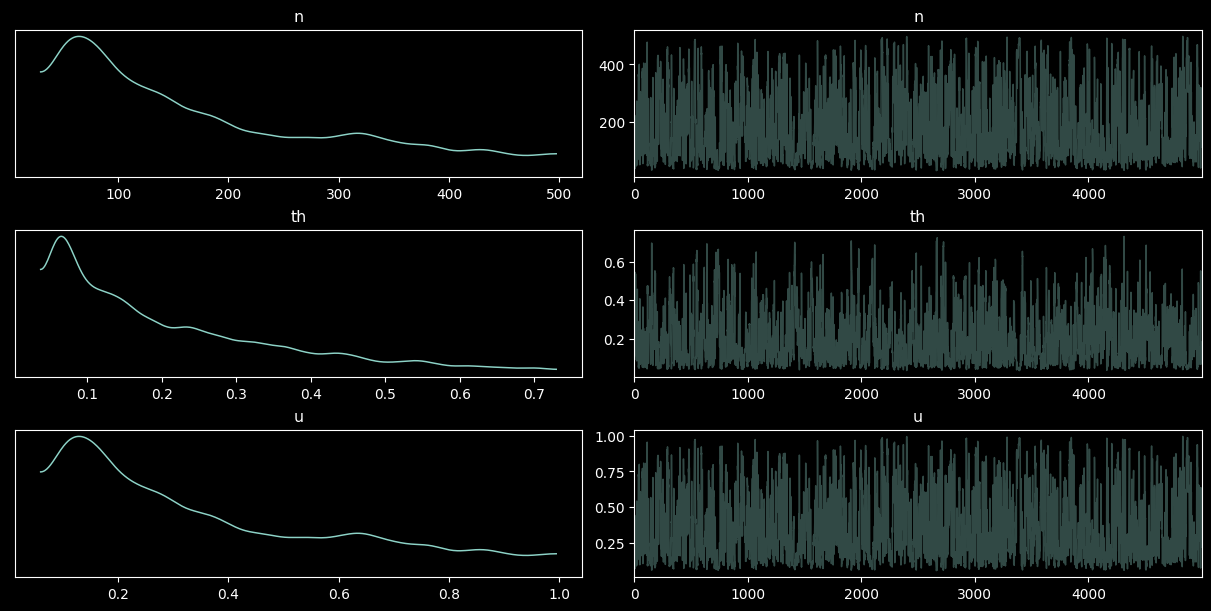

In [475]:
arviz.plot_trace(samples);

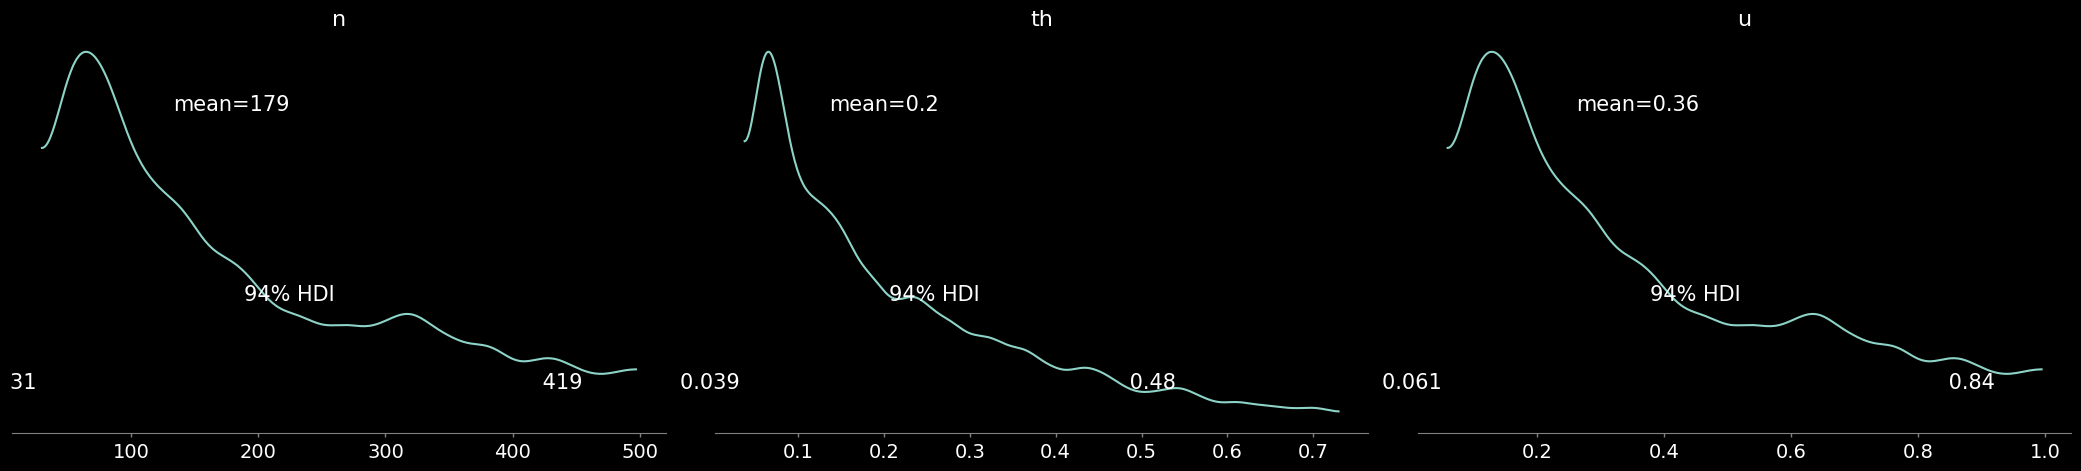

In [476]:
arviz.plot_posterior(samples);

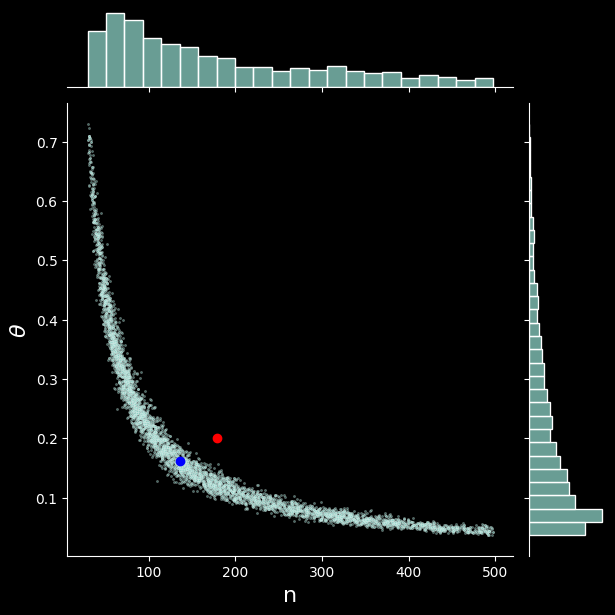

In [477]:
# https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
g = sns.jointplot(x=samples['n'], y=samples['th'], s=10, alpha=.5, marker='.')
g.set_axis_labels('n', '$\\theta$', fontsize=16);
# g.plot_marginals(sns.rugplot, color='r', height=.1, clip_on=False);
g.ax_joint.plot(samples['n'].mean(), samples['th'].mean(), 'ro');

iix, iiy = argmax_kde(samples['n'], samples['th'])
g.ax_joint.plot(iix, iiy, 'bo');

---

### Without `n` variable.
- `numpyro` automatically calculates it by a process called **marginalization** inside the inference module.
- So the model is the same.
- inference is done by NUTS MCMC.

In [424]:
def model36(a, b, probs, k=None):
    """
        k: m dimensional. observation vector out of binomial
    """
    # priors: th, n
    n = numpyro.sample('n', dist.Categorical(probs=probs))
    th = numpyro.sample('th', dist.Beta(a, b))
    # observation
    size = len(k)
    with numpyro.plate(f'i=1..{size}', size=size):
        obs = numpyro.sample('k', dist.Binomial(total_count=n, probs=th), obs=k)

In [425]:
# data
# https://github.com/stan-dev/example-models/blob/master/Bayesian_Cognitive_Modeling/ParameterEstimation/Binomial/Survey.data.R
a, b = 1, 1
k = jnp.array([16, 18, 22, 25, 27])
nmax = 500
probs = jnp.array([1.]*nmax) / nmax

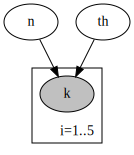

In [426]:
numpyro.render_model(model36, model_args=(a, b, probs, k))

In [427]:
kernel = NUTS(model36)
#
mcmc = MCMC(kernel, num_warmup=1000, num_samples=5000, num_chains=1, thinning=1)
mcmc.run(rng_key, a=b, b=b, probs=probs, k=k)
mcmc.print_summary()

sample: 100%|██████████| 6000/6000 [00:11<00:00, 516.74it/s, 3 steps of size 5.71e-01. acc. prob=0.79] 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        th      0.20      0.15      0.15      0.04      0.43   1098.62      1.00

Number of divergences: 0


In [428]:
samples = mcmc.get_samples()
samples.keys()

dict_keys(['th'])

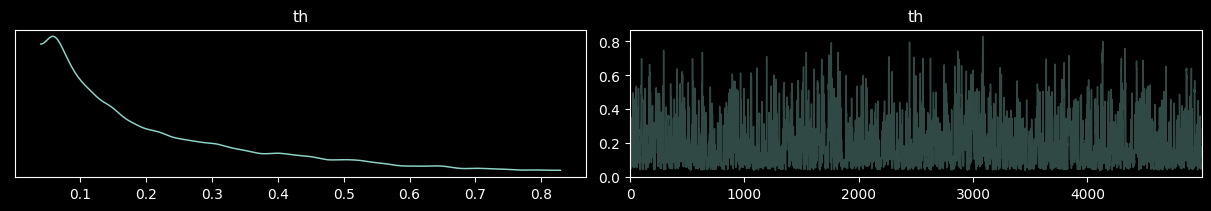

In [429]:
arviz.plot_trace(samples);

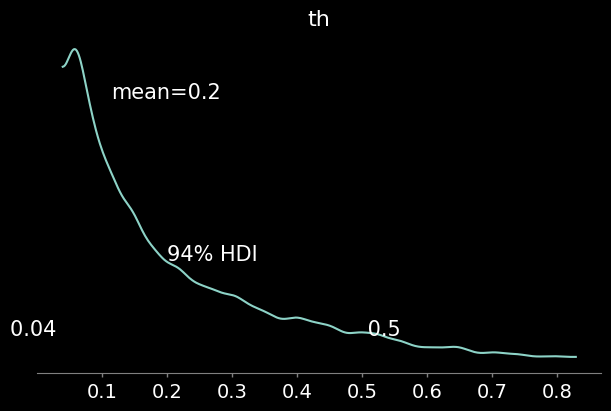

In [430]:
arviz.plot_posterior(samples);

- Since the sample of 'n' is not provided, we cannot plot its histogram.

End.